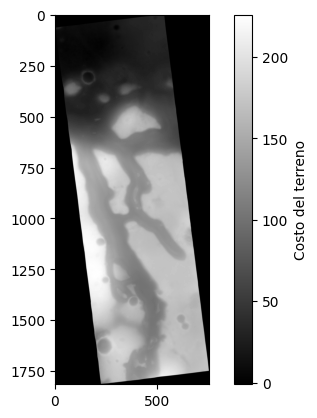

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.colors import LightSource

# Cargar el mapa desde el archivo .npy
mars_map= np.load("Mapa/mars_map.npy")


In [8]:
nr, nc = mars_map.shape

C:\Users\mario\AppData\Local\Temp\ipykernel_4040\3745227069.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


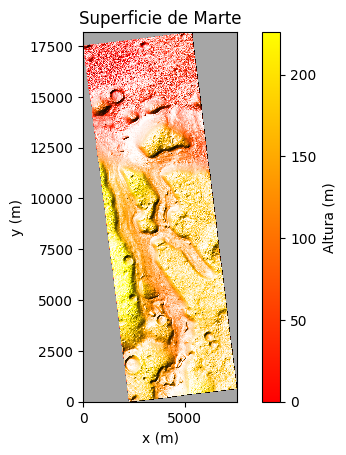

In [ ]:
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
scale=10.0174
ls = LightSource(315, 45)
rgb = ls.shade(mars_map, cmap=cmap, vmin = 0, vmax = mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots()

im = ax.imshow(rgb, cmap=cmap, vmin = 0, vmax = mars_map.max(), 
                extent =[0, scale*nc, 0, scale*nr], 
                interpolation ='nearest', origin ='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')

plt.title('Superficie de Marte')
plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.show()

In [12]:
def calcrc(nr,nc,x,y,scale):
    r = nr -round(y/scale)
    c = round(x/scale)
    return r,c
r,c = calcrc(nr,nc,2850,6400,scale)
print(r,c)
print(f"Ubicacion en el mapa: {mars_map[r,c]}")

1176 285
Ubicacion en el mapa: 145.52597656250015


In [ ]:
import heapq

class GreedyBestFirstSearch:
    def __init__(self, problem):
        self.problem = problem
        self.frontier = []
        heapq.heappush(self.frontier, (self.heuristic(problem.initial), problem.initial))
        self.explored = set()
        self.came_from = {}
    

    # Heurística: distancia Manhattan que cuenta las diagonales
    def heuristic(self, state):
        x1, y1 = state
        x2, y2 = self.problem.goal
        dx = abs(x1 - x2)
        dy = abs(y1 - y2)
        return (dx + dy) + (np.sqrt(2) - 2) * min(dx, dy)

    def search(self):
        while self.frontier:
            _, current_state = heapq.heappop(self.frontier)
            if self.problem.goal_test(current_state):
                return self.solution(current_state)
            self.explored.add(current_state)
            
            for action in self.problem.actions(current_state):
                child_state = self.problem.result(current_state, action)
                if child_state not in self.explored:
                    heapq.heappush(self.frontier, (self.heuristic(child_state), child_state))
                    self.came_from[child_state] = current_state
        return None

    def solution(self, state):
        path = []
        while state in self.came_from:
            path.append(state)
            state = self.came_from[state]
        path.append(state)
        path.reverse()
        return path


class Marte_Problem:
    def __init__(self, initial, goal, maze):
        self.initial = initial
        self.goal = goal
        self.maze = maze
        self.rows, self.cols = maze.shape

    def goal_test(self, state):
        return state == self.goal

    def actions(self, state):
        x, y = state
        posibles_mov = [
            (x-1, y), 
            (x+1, y),   
            (x, y-1),   
            (x, y+1),   
            (x-1, y-1), 
            (x-1, y+1), 
            (x+1, y-1), 
            (x+1, y+1)  
        ]

        return [(nx, ny) for nx, ny in posibles_mov
                if 0 <= nx < self.rows and 0 <= ny < self.cols and self.maze[nx, ny] != 255]

    def result(self, state, action):
        return action  




La solución es: [(1176, 285), (1175, 286), (1174, 287), (1173, 288), (1172, 289), (1171, 290), (1170, 291), (1169, 292), (1168, 293), (1167, 294), (1166, 295), (1165, 296), (1164, 297), (1163, 298), (1162, 299), (1161, 300), (1160, 301), (1159, 302), (1158, 303), (1157, 304), (1156, 305), (1155, 306), (1154, 307), (1153, 308), (1152, 309), (1151, 310), (1150, 311), (1149, 312), (1148, 313), (1147, 314), (1146, 315), (1145, 316), (1144, 317), (1143, 318), (1142, 319), (1141, 320), (1140, 321), (1139, 322), (1138, 323), (1137, 324), (1136, 325), (1135, 326), (1134, 327), (1133, 328), (1132, 329), (1131, 330), (1130, 331), (1129, 332), (1128, 333), (1127, 334), (1126, 335), (1125, 336), (1124, 337), (1123, 338), (1122, 339), (1121, 340), (1120, 341), (1119, 342), (1118, 343), (1117, 344), (1116, 345), (1115, 346), (1114, 347), (1113, 348), (1112, 349), (1111, 350), (1110, 351), (1109, 352), (1108, 353), (1107, 354), (1106, 355), (1105, 356), (1104, 357), (1103, 358), (1102, 359), (1101, 3

C:\Users\mario\AppData\Local\Temp\ipykernel_4040\3823183389.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = copy.copy(plt.cm.get_cmap('autumn'))


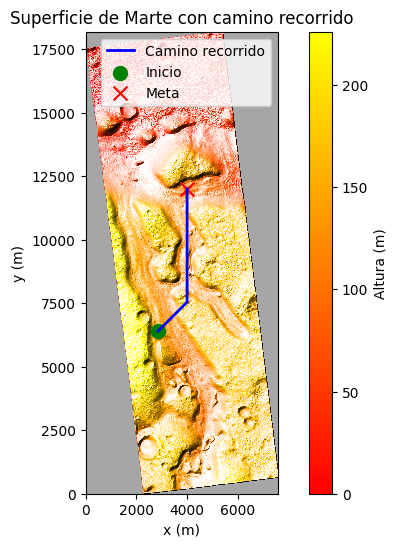

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from matplotlib.colors import LightSource

def calcrc(nr, nc, x, y, scale): 
    r = nr - round(y / scale)
    c = round(x / scale)
    return r, c


scale = 10.0174
nr, nc = mars_map.shape  

x_start, y_start = 2850, 6400
x_goal, y_goal = 4000, 12000

start = calcrc(nr, nc, x_start, y_start, scale)
goal = calcrc(nr, nc, x_goal, y_goal, scale)


problem = Marte_Problem(start, goal, mars_map)
gbfs = GreedyBestFirstSearch(problem)
solution = gbfs.search()
print(f"La solución es: {solution}")
cmap = copy.copy(plt.cm.get_cmap('autumn'))
cmap.set_under(color='black')   
ls = LightSource(315, 45)


rgb = ls.shade(mars_map, cmap=cmap, vmin=0, vmax=mars_map.max(), vert_exag=2, blend_mode='hsv')

fig, ax = plt.subplots(figsize=(8, 6))

im = ax.imshow(rgb, cmap=cmap, vmin=0, vmax=mars_map.max(),
               extent=[0, scale * nc, 0, scale * nr], 
               interpolation='nearest', origin='upper')

if solution:
    camino_x = [c * scale for _, c in solution]  
    camino_y = [(nr - r) * scale for r, _ in solution] 
    ax.plot(camino_x, camino_y, color='blue', linewidth=2, label="Camino recorrido")

ax.scatter(x_start, y_start, color='green', marker='o', s=100, label="Inicio")
ax.scatter(x_goal, y_goal, color='red', marker='x', s=100, label="Meta")

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Altura (m)')


plt.title('Superficie de Marte con camino recorrido')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()


plt.show()
